In [88]:
%run '0.0_init_configuration.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
df = pd.read_csv('../../../data/processed/datos_procesados_penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Conteos y proporciones

### Preludio: ¿Qué estadísticos describen el conjunto de datos?

In [90]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Conteo por especies

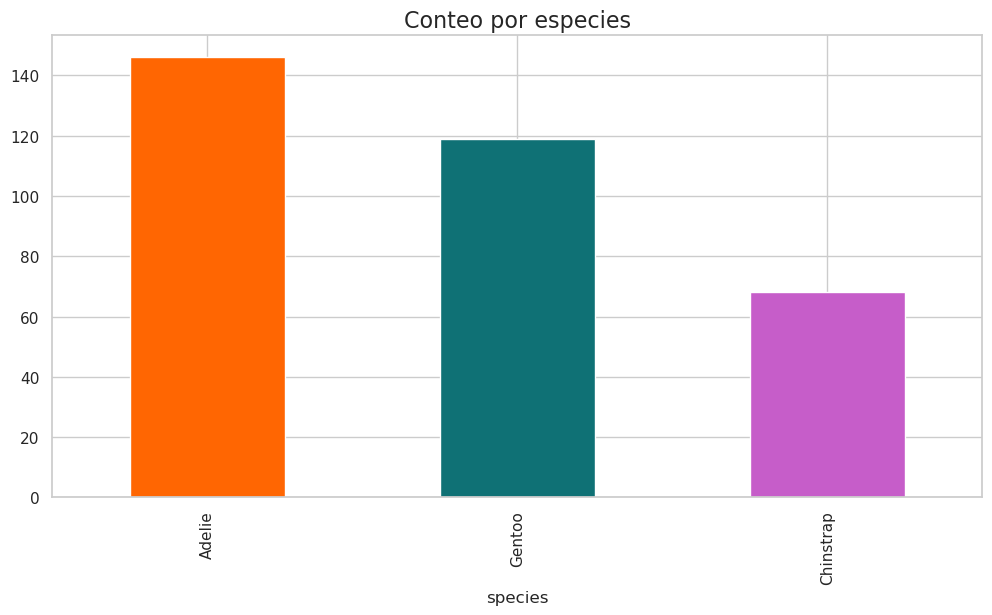

In [91]:
df['species'].value_counts().plot(kind='bar',
                                  color=penguin_color.values())

plt.title('Conteo por especies', fontsize=16)

plt.show()

### Gráfica proporcionalmente

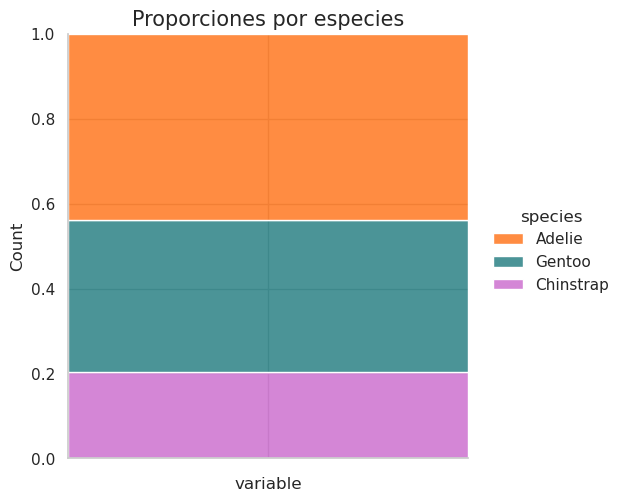

In [92]:
(df
 .assign(variable='')
 .pipe(lambda df:(sns.displot(data=df,
                              x='variable',
                              hue='species',
                              multiple='fill',
                              palette=penguin_color))))

plt.title('Proporciones por especies', fontsize=15)
plt.show()

### Medidas de tendencia central

### Media o promedio

In [93]:
#Promedio de los picos de los pinguinos
df.bill_depth_mm.mean()

17.164864864864867

In [94]:
#Promedio de todas las variables
df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [95]:
#Mediana
df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

In [96]:
#Moda
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


### ¿Cuál es el rango de las variables?

In [97]:
df.max(numeric_only=True) - df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### Rango intercuartílico

In [98]:
(
    df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .T
    .rename_axis('Metric')
    .reset_index()
    .assign(iqr=lambda df:df[0.75] - df[0.25]) # Calculamos el rango intercuartil
)

,Metric,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


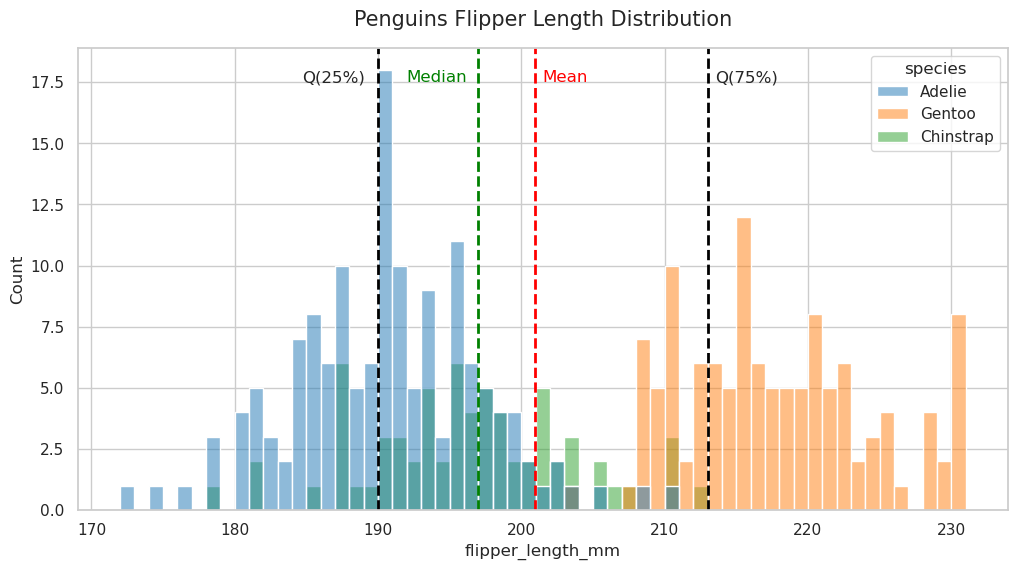

In [99]:
hist = sns.histplot(data=df,
                    x='flipper_length_mm',
                    binwidth=1,
                    hue='species',
                    alpha=.5) # transparencia

hist.set_title('Penguins Flipper Length Distribution', fontsize= 15, y=1.03)

plt.axvline(x=df.flipper_length_mm.mean(),
            linestyle='dashed',
            color='r',
            linewidth=2)

plt.axvline(x=df.flipper_length_mm.median(),
            linestyle='dashed',
            color='g',
            linewidth=2)

plt.axvline(x=df.flipper_length_mm.quantile(0.75),
            linestyle='dashed',
            color='k',
            linewidth=2)

plt.axvline(x=df.flipper_length_mm.quantile(0.25),
            linestyle='dashed',
            color='k',
            linewidth=2)

plt.text(184.7, 17.5, 'Q(25%)', fontsize=12)
plt.text(192, 17.5, 'Median', fontsize=12, color='g')
plt.text(201.5, 17.5, 'Mean', fontsize=12, color='r')
plt.text(213.5, 17.5, 'Q(75%)', fontsize=12)
plt.show()

In [102]:
#Buscamos coincidencias con las columnas
adelie_df = df.query('species=="Adelie"')
gento_df = df.query('species=="Gentoo"')
chinstrap_df = df.query('species=="Chinstrap"')

list_categories=[adelie_df, gento_df, chinstrap_df]

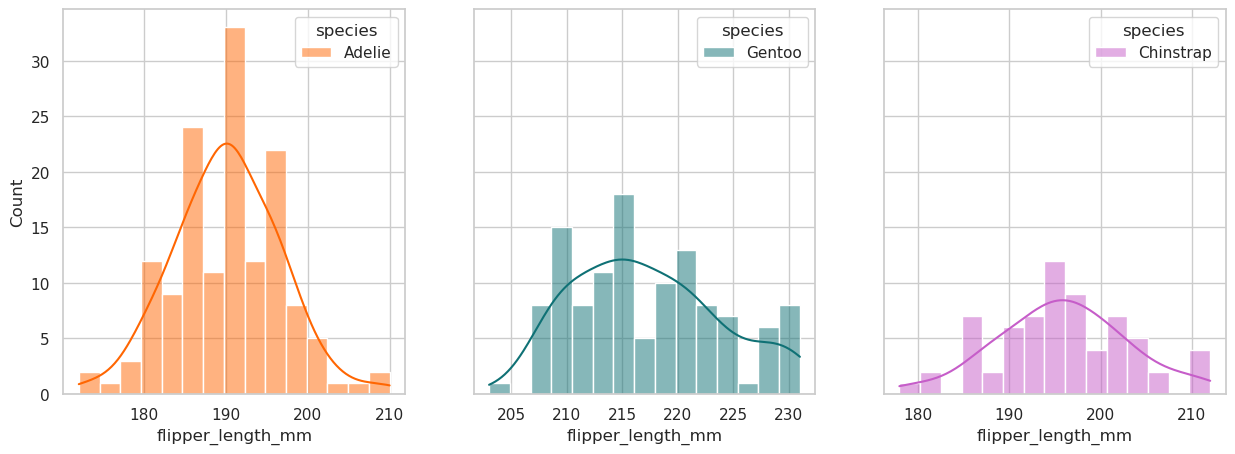

In [113]:
fig, ax = plt.subplots(1, len(list_categories), figsize=(15,5), sharey=True)

for i in range(len(list_categories)):
    sns.histplot(ax=ax[i],
                 data=list_categories[i],
                 x='flipper_length_mm',
                 multiple='layer', #apilamos los histogramas
                 hue='species',
                 bins=15,
                 kde=True,
                 palette=penguin_color)

plt.show()